In [6]:
# load libraries and scripts
import JSON
using Plots
using HDF5
using Trapz
using Statistics
using CairoMakie
using SparseArrays
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")

perform_dyn_sim_vec (generic function with 1 method)

In [7]:
#load borders
border = import_border("../data/borders/border.json")
border = border
# create the lattice grid
dx = 20 
Nx, Ny, xrange, yrange, isinside, isborder, n = get_grid(border, Float64(dx))
isgrid = isinside .| isborder
# define x and y coordinate for plotting
x = repeat(reshape(xrange,1,Nx), Ny, 1)
y = repeat(reshape(yrange,Ny,1), 1, Nx);


In [33]:
# compute or load grid parameters
recompute_param = true
if(recompute_param || isfile("../numerics/grid_params_" * string(dx) * ".h5"))
    bx, by, p, m, d = get_params_diff(isinside, n, Float64(dx), yrange, xrange, "../data/disc/pantagruel.h5",
        "../numerics/grid_params_" * string(dx) * ".h5", Niter = 10000, dmax = 10.0, patch=0.003, bmin=0.01)
    #bx, by, p, m, d = get_params(isinside, isborder, n, Float64(dx), yrange, xrange, "../data/pantagruel.h5",
    #    "../numerics/grid_params_" * string(dx) * ".h5", bmin=0.1, sigma=0.1)
else
    bx, by, p, m, d = get_params(isinside, "../numerics/grid_params_" * string(dx) * ".h5")
end

Done with inertia.
Done with damping.
Done with with generation.
Done with load.
191.146138 seconds (6.17 G allocations: 100.435 GiB, 4.04% gc time)


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

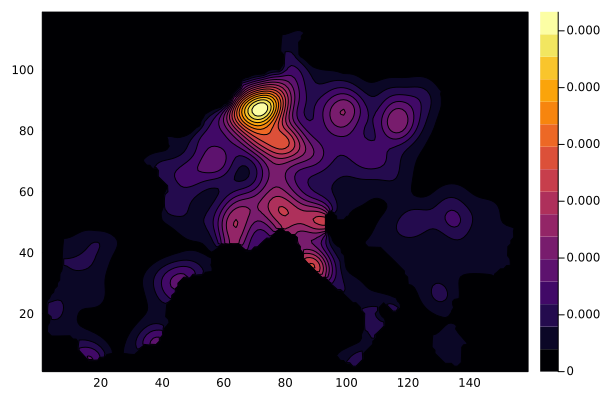

In [34]:

Plots.contour(m,fill=true)
# Plots.contour(d,fill=true)
#minimum(bx[bx.>0])
#println(sum(p[isborder]))

In [35]:
# compute, iteratively, the stable solution
th, ths = compute_stable_sol(isinside, n, bx, by, p, Niter = 20000, interval = 1000);

[1000.0 0.0002491358966458246]
[2000.0 0.00016484693875107315]
[3000.0 0.0001216114255052636]
[4000.0 9.143787512799761e-5]
[5000.0 6.978588212003256e-5]
[6000.0 5.4173484712816133e-5]
[7000.0 4.284600187554055e-5]
[8000.0 3.4551039102437286e-5]
[9000.0 2.8405839663347976e-5]
[10000.0 2.3792928877997e-5]
[11000.0 2.0281413408040905e-5]
[12000.0 1.7570134403177562e-5]
[13000.0 1.5447634742704608e-5]
[14000.0 1.376437234767991e-5]
[15000.0 1.2413591347737452e-5]
[16000.0 1.131820990729615e-5]
[17000.0 1.0421845887620407e-5]
[18000.0 9.68267028866876e-6]
[19000.0 9.069186318599876e-6]
[20000.0 8.557317835666822e-6]
 37.487077 seconds (1.24 G allocations: 18.526 GiB, 3.86% gc time)


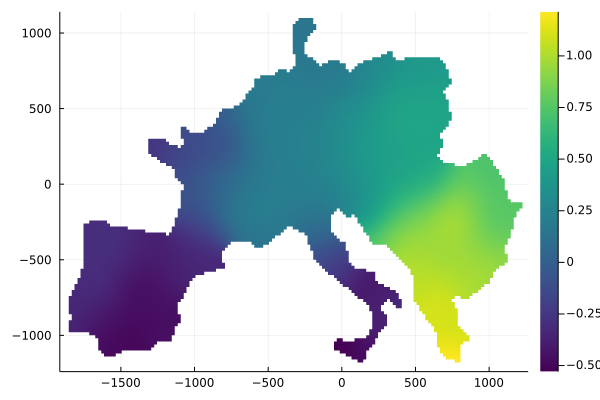

In [36]:
hm_plot(isinside, xrange, yrange, th)

In [27]:
# save the result
fid = h5open("../numerics/stable_" * string(dx) * ".h5", "w")
write(fid, "th", th)
close(fid)

In [28]:
gen, dem, bline, idb, idgen, coord, mg, dg, dl, th_ref = load_discrete_model("../data/disc/pantagruel.h5");

In [29]:
th2 = set_ref_phase(isinside, yrange, xrange, th, [750.0; -1000.0], th_ref = 0.0)
th_cont = get_discrete_values(isinside, yrange, xrange, th, coord);

[755.284091241364, -1009.7736429415891]1.069665500139704


In [30]:
Plots.plot(th_ref, label="th_disc")
Plots.plot!(th_cont, label="th_cont")
savefig("theta.pdf")

[12, 134]


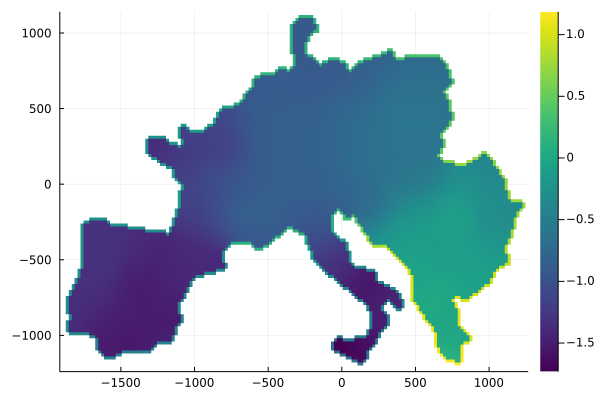

In [31]:
fx, fy = power_flow(isinside, th, bx, by, Float64(dx))
hm_plot(isgrid, xrange, yrange, th)

In [32]:
# plot the 
f = Figure(resolution = (800, 800))
Axis(f[1, 1])
Makie.arrows!(x[isgrid], y[isgrid], -fx[isgrid], -fy[isgrid], linewidth = 0.5, arrowsize = 1.8, lengthscale = 100)
save("flows.pdf",f)

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x00007fbfb0165490, 600.0, 600.0, IOContext(IOStream(<file /Users/julianfritzsch/Documents/temp/ContGridMod/notebooks/flows.pdf>)))
